<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_Aula_03_2_(Modelos_param%C3%A9tricos_vs_n%C3%A3o_param%C3%A9tricos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 03.2 Modelos Paramétricos vs. Não-Paramétricos

Objetivos de Aprendizado:

- Entender as diferenças entre modelos paramétricos e não-paramétricos
- Implementar e comparar Regressão Linear (paramétrica) e KNN (não-paramétrico)
- Analisar o desempenho em dados complexos e simplicidade de implementação

## Roteiro

1. Introdução Teórica (com código)

In [ ]:
# Modelos Paramétricos:
# - Têm um número fixo de parâmetros independente do tamanho dos dados
# - Fazem suposições fortes sobre a forma da função
# - Exemplos: Regressão Linear, Regressão Logística

# Modelos Não-Paramétricos:
# - Número de parâmetros cresce com os dados
# - Fazem suposições mínimas sobre a função
# - Exemplos: KNN, Árvores de Decisão, SVMs com certos kernels

2. Carregamento e Preparação dos Dados

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Carregar dados de preços de imóveis
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar características (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Implementação do Modelo Paramétrico

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Treinamento da Regressão Linear
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_training_time = time.time() - start_time

# Avaliação
lr_preds = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

4. Implementação do Modelo Não-Paramétrico

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Treinamento do KNN
start_time = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_training_time = time.time() - start_time

# Avaliação
knn_preds = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_preds)
knn_r2 = r2_score(y_test, knn_preds)

5. Visualização e Comparação

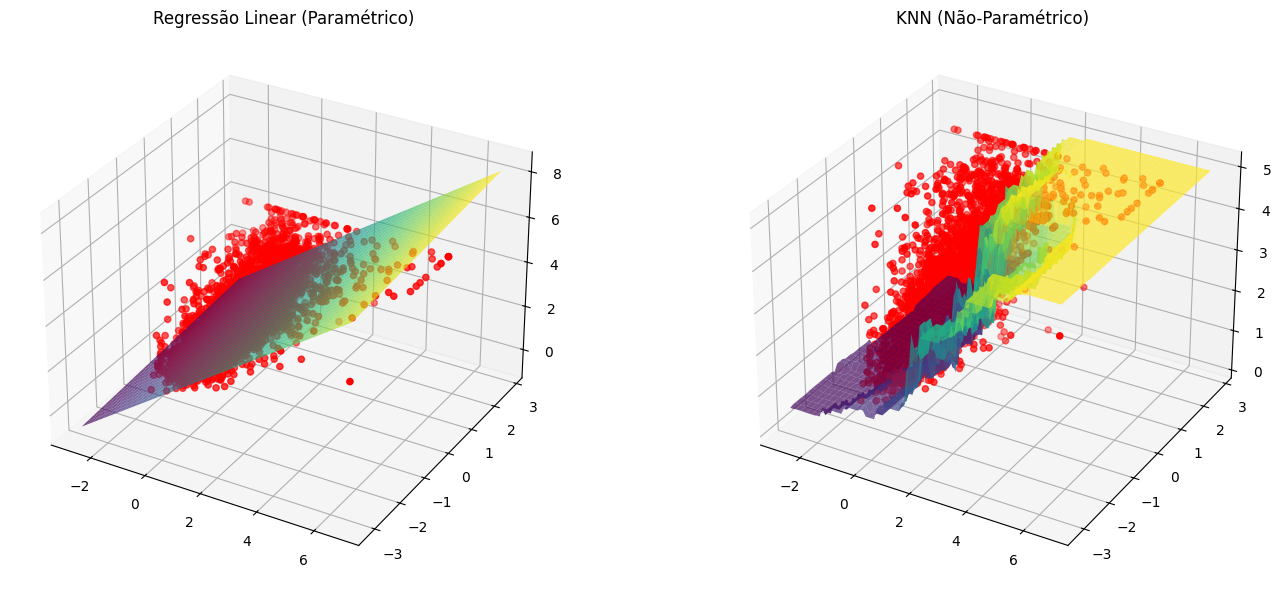

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Escolher duas características para visualizar
feature1, feature2 = 0, 1  # MedInc, HouseAge

# Definir grade para visualização
x_min, x_max = X_test_scaled[:, feature1].min() - 1, X_test_scaled[:, feature1].max() + 1
y_min, y_max = X_test_scaled[:, feature2].min() - 1, X_test_scaled[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Visualização 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))

# Superfície de predição para Regressão Linear
ax1 = fig.add_subplot(121, projection='3d')
Z_lr = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Criar ponto com valores médios para outras características
        test_point = np.zeros((1, X_test_scaled.shape[1]))
        test_point[0, feature1] = xx[i, j]
        test_point[0, feature2] = yy[i, j]
        Z_lr[i, j] = lr_model.predict(test_point)[0]

surf1 = ax1.plot_surface(xx, yy, Z_lr, cmap='viridis', alpha=0.7)
ax1.scatter(X_test_scaled[:, feature1], X_test_scaled[:, feature2], y_test, c='r', marker='o')
ax1.set_title('Regressão Linear (Paramétrico)')

# Superfície de predição para KNN
ax2 = fig.add_subplot(122, projection='3d')
Z_knn = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        test_point = np.zeros((1, X_test_scaled.shape[1]))
        test_point[0, feature1] = xx[i, j]
        test_point[0, feature2] = yy[i, j]
        Z_knn[i, j] = knn_model.predict(test_point)[0]

surf2 = ax2.plot_surface(xx, yy, Z_knn, cmap='viridis', alpha=0.7)
ax2.scatter(X_test_scaled[:, feature1], X_test_scaled[:, feature2], y_test, c='r', marker='o')
ax2.set_title('KNN (Não-Paramétrico)')

plt.tight_layout()

6. Experimento: Aumento do Conjunto de Dados

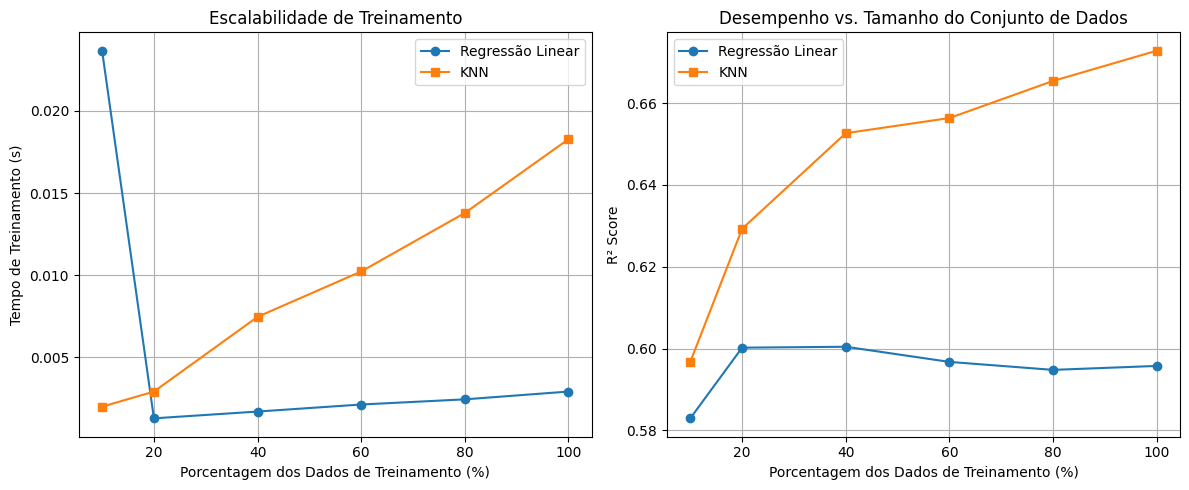

In [ ]:
# Testar desempenho com diferentes tamanhos de conjunto de treinamento
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
lr_train_times = []
knn_train_times = []
lr_scores = []
knn_scores = []

for size in train_sizes:
    # Seleciona subset dos dados de treinamento
    subset_size = int(len(X_train) * size)
    X_subset = X_train_scaled[:subset_size]
    y_subset = y_train[:subset_size]

    # Linear Regression
    start_time = time.time()
    lr = LinearRegression().fit(X_subset, y_subset)
    lr_train_times.append(time.time() - start_time)
    lr_scores.append(r2_score(y_test, lr.predict(X_test_scaled)))

    # KNN
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=5).fit(X_subset, y_subset)
    knn_train_times.append(time.time() - start_time)
    knn_scores.append(r2_score(y_test, knn.predict(X_test_scaled)))

# Visualizar tempos de treinamento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot([size*100 for size in train_sizes], lr_train_times, 'o-', label='Regressão Linear')
plt.plot([size*100 for size in train_sizes], knn_train_times, 's-', label='KNN')
plt.xlabel('Porcentagem dos Dados de Treinamento (%)')
plt.ylabel('Tempo de Treinamento (s)')
plt.title('Escalabilidade de Treinamento')
plt.legend()
plt.grid(True)

# Visualizar R2 Scores
plt.subplot(1, 2, 2)
plt.plot([size*100 for size in train_sizes], lr_scores, 'o-', label='Regressão Linear')
plt.plot([size*100 for size in train_sizes], knn_scores, 's-', label='KNN')
plt.xlabel('Porcentagem dos Dados de Treinamento (%)')
plt.ylabel('R² Score')
plt.title('Desempenho vs. Tamanho do Conjunto de Dados')
plt.legend()
plt.grid(True)
plt.tight_layout()

7. Implementação de Regularização (paramétrico avançado)

<Figure size 1200x600 with 0 Axes>

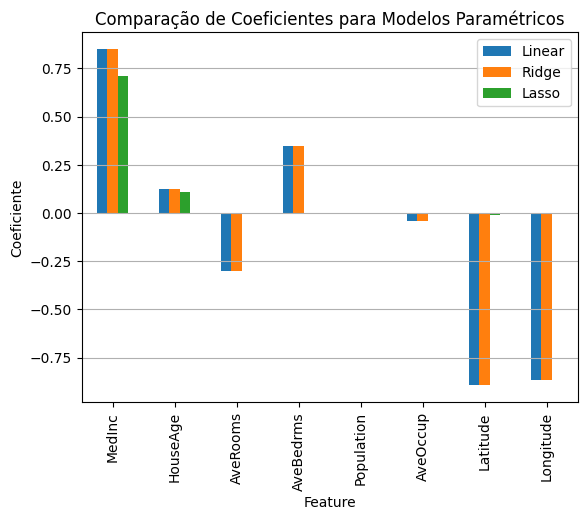

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso

# Ridge (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_preds)

# Lasso (L1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, lasso_preds)

# Visualizar coeficientes de cada modelo
coefs = pd.DataFrame({
    'Feature': housing.feature_names,
    'Linear': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

plt.figure(figsize=(12, 6))
coefs.set_index('Feature').plot(kind='bar')
plt.title('Comparação de Coeficientes para Modelos Paramétricos')
plt.ylabel('Coeficiente')
plt.grid(True, axis='y')

## Exercício

### Perguntas para Discussão:

1. Qual modelo teve melhor desempenho? Em quais condições?
2. Como a complexidade dos dados afeta cada tipo de modelo?
3. Como o tempo de treinamento escala para cada modelo à medida que os dados aumentam?
4. Qual regularização (Ridge ou Lasso) funcionou melhor? Por quê?
5. Quais são as vantagens práticas de modelos paramétricos vs. não-paramétricos?
6. Como você escolheria entre um modelo paramétrico e não-paramétrico em um problema real?